In [1]:
import keras
import random, os
from keras.layers import Activation, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten
from keras.models import Model, Sequential
from keras import backend as K
from glob import glob
import numpy as np
import re
from keras.utils.vis_utils import model_to_dot
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import Image
import PIL

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 6
epochs = 1000
img_rows, img_cols = 28, 28
label = ["circle", "square", "triangle", "horizontal", "vertical", "diagonal"]

In [3]:
def load_data():
    tr_path = './dataset/trains/'
    te_path = './dataset/tests/'
    va_path = './dataset/vals/'
    
    (tr_sets, tr_labels, _) = get_datasets_labels(tr_path)
    (te_sets, te_labels, test_labels_with_num) = get_datasets_labels(te_path)
    (va_sets, va_labels, _) = get_datasets_labels(va_path)
    
    
    tr_sets = np.array(tr_sets)
    te_sets = np.array(te_sets)
    va_sets = np.array(va_sets)
    tr_labels = np.array(tr_labels)
    te_labels = np.array(te_labels)
    va_labels = np.array(va_labels)
    test_labels_with_num = np.array(test_labels_with_num)
    return tr_sets, tr_labels, te_sets, te_labels, va_sets, va_labels, test_labels_with_num

In [4]:
def get_datasets_labels(path):
	files = os.listdir(path)
	labels = []
	lbs = []
	sets = []
	for file in files:
		pic = PIL.Image.open(path + file).convert('L')
		lb = file.replace(re.findall("\d+", file)[0], '').replace('.png', '') 
		forlb = file.replace('.png', '') 
		
		labels.append(label.index(lb))
		lbs.append(forlb)
		
		pic = np.array(pic)
		sets.append(pic)
	return sets, labels, lbs

In [5]:
(x_train, y_train, x_test, y_test, x_val, y_val, test_labels_with_num) = load_data()
y_test1 = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255.
x_test /= 255.
x_val /= 255.

In [6]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Test loss: 0.06143441551510894
Test accuracy: 0.9925


In [10]:
def write_output(filename, shape, size):
    result = []
    for i in range(len(shape)):
        tc = shape[i].reshape(1, img_rows, img_cols, 1)
        output = get_layer_output([tc])
        output = np.array(output).reshape(size)
        result.append(output)
    np.save(filename, result)

In [11]:
circle = []
circle_filename = []
square = []
square_filename = []
triangle = []
triangle_filename = []
horizontal = []
horizontal_filename = []
vertical = []
vertical_filename = []
diagonal = []
diagonal_filename = []

In [12]:
for i in range(len(y_test1)):
    if y_test1[i] == 0:
        circle.append(x_test[i])
        circle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 1:
        square.append(x_test[i])
        square_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 2:
        triangle.append(x_test[i])
        triangle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 3:
        horizontal.append(x_test[i])
        horizontal_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 4:
        vertical.append(x_test[i])
        vertical_filename.append(test_labels_with_num[i])
    else:
        diagonal.append(x_test[i])
        diagonal_filename.append(test_labels_with_num[i])

In [13]:
get_layer_output = K.function([model.layers[0].input], [model.layers[15].output])

In [14]:
output_size = 64
write_output("./2nd_result/circle_output", circle, output_size)
write_output("./2nd_result/square_output", square, output_size)
write_output("./2nd_result/triangle_output", triangle, output_size)
write_output("./2nd_result/horizontal_output", horizontal, output_size)
write_output("./2nd_result/vertical_output", vertical, output_size)
write_output("./2nd_result/diagonal_output", diagonal, output_size)

In [15]:
total_filename = circle_filename+ square_filename + triangle_filename + horizontal_filename + vertical_filename+diagonal_filename

In [16]:
def getMaxMin(shape):
    mmax = -1000
    mmin = 1000
    for i in range(len(shape)):
        max = -1000
        min = 1000
        for j in range(len(shape[i])):
            if max < shape[i][j]:
                max = shape[i][j]
            if min > shape[i][j]:
                min = shape[i][j]
        if mmax < max:
            mmax = max
        if mmin > min:
            mmin = min
    return mmax, mmin

In [17]:
circle = np.load("./2nd_result/circle_output.npy")
square = np.load("./2nd_result/square_output.npy")
triangle = np.load("./2nd_result/triangle_output.npy")
horizontal = np.load("./2nd_result/horizontal_output.npy")
vertical = np.load("./2nd_result/vertical_output.npy")
diagonal = np.load("./2nd_result/diagonal_output.npy")

In [18]:
print("circle",getMaxMin(circle))
print("square",getMaxMin(square))
print("triangle",getMaxMin(triangle))
print("horizontal",getMaxMin(horizontal))
print("vertical",getMaxMin(vertical))
print("diagonal",getMaxMin(diagonal))

circle (38.591267, 0.0)
square (52.296597, 0.0)
triangle (41.929466, 0.0)
horizontal (29.047886, 0.0)
vertical (31.263083, 0.0)
diagonal (50.33031, 0.0)


In [19]:
rand_index = random.randint(0, 100)
one = np.vstack([circle, square])
two = np.vstack([triangle, horizontal])
thr = np.vstack([vertical, diagonal])
total = np.vstack([one, two])
total = np.vstack([total, thr])

In [20]:
circle_dist = []
square_dist = []
triangle_dist = []
hor_dist = []
ver_dist = []
dia_dist = []

for line in total:
    circle_dist.append(distance.euclidean(circle[rand_index], line))
    square_dist.append(distance.euclidean(square[rand_index], line))
    triangle_dist.append(distance.euclidean(triangle[rand_index], line))
    hor_dist.append(distance.euclidean(horizontal[rand_index], line))
    ver_dist.append(distance.euclidean(vertical[rand_index], line))
    dia_dist.append(distance.euclidean(diagonal[rand_index], line))
    

In [21]:
ordered_circle_dist = np.array(circle_dist).argsort()
#print(ordered_circle_dist)
ordered_square_dist = np.array(square_dist).argsort()
#print(ordered_square_dist)
ordered_triangle_dist = np.array(triangle_dist).argsort()
#print(ordered_triangle_dist)
ordered_hor_dist = np.array(hor_dist).argsort()
#print(ordered_hor_dist)
ordered_ver_dist = np.array(ver_dist).argsort()
#print(ordered_ver_dist)
ordered_dia_dist = np.array(dia_dist).argsort()
#print(ordered_dia_dist)

In [22]:
def getCompareImages(shape, ordered_shape_dist):
    
    path = './dataset/tests/'
    images = []
    for i in range(len(ordered_shape_dist)):
        images.append(path + total_filename[ordered_shape_dist[i]] + ".png")
    
    names = []
    unit = 30
    
    for i in range(0, int(len(ordered_shape_dist)/unit)):
        imgs = [PIL.Image.open(i).convert('L') for i in images[i*unit:unit*(i+1)]]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        filename = "./2nd_result/test_"+ shape + str(i) + ".jpg"
        names.append(filename)
        imgs_comb.save(filename)

    imgs = [PIL.Image.open(i).convert('L') for i in names]
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( './2nd_result/' + shape+ '.jpg' )

    display(Image(path+total_filename[ordered_shape_dist[0]]+".png"))
    display(Image('./2nd_result/'+shape+'.jpg' ))

/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


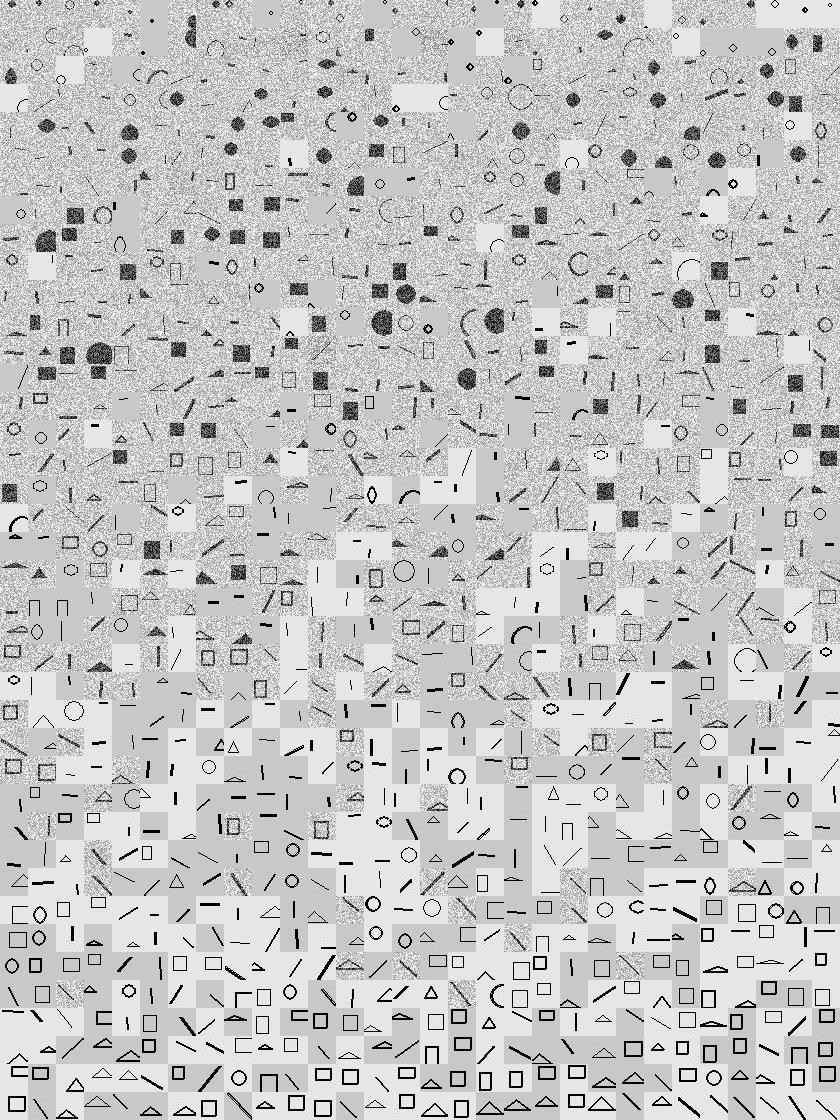

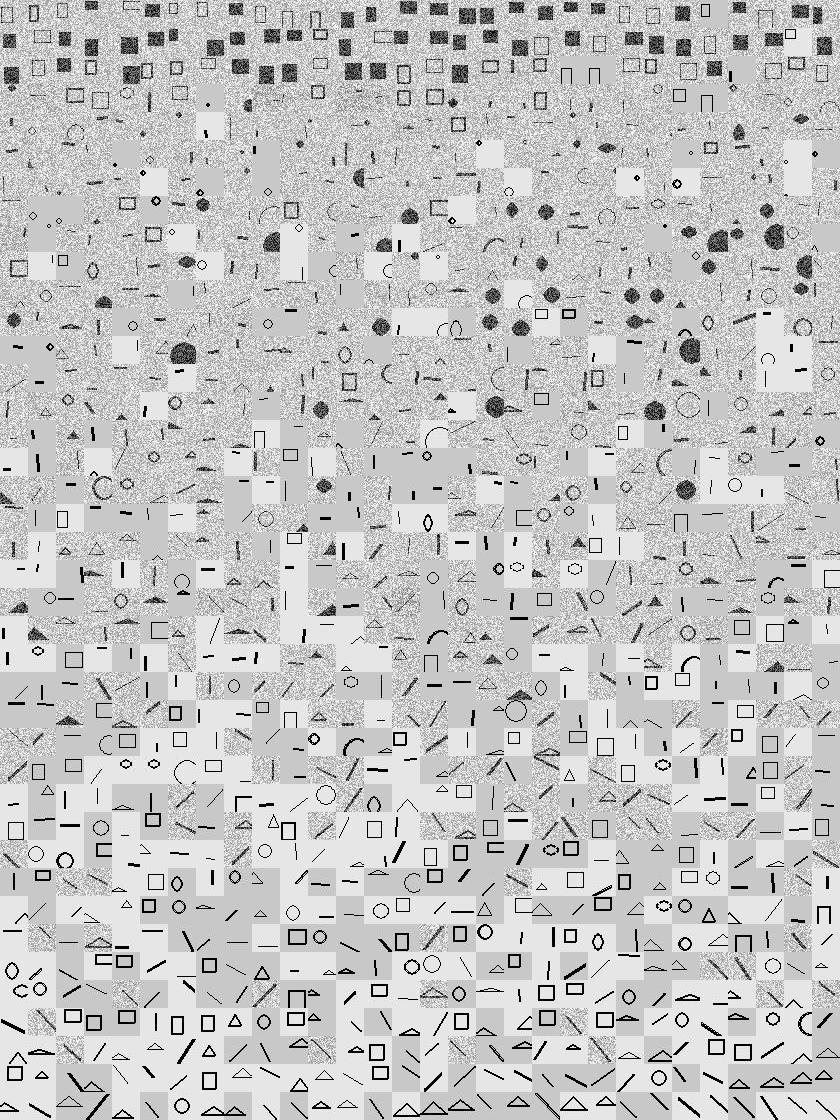

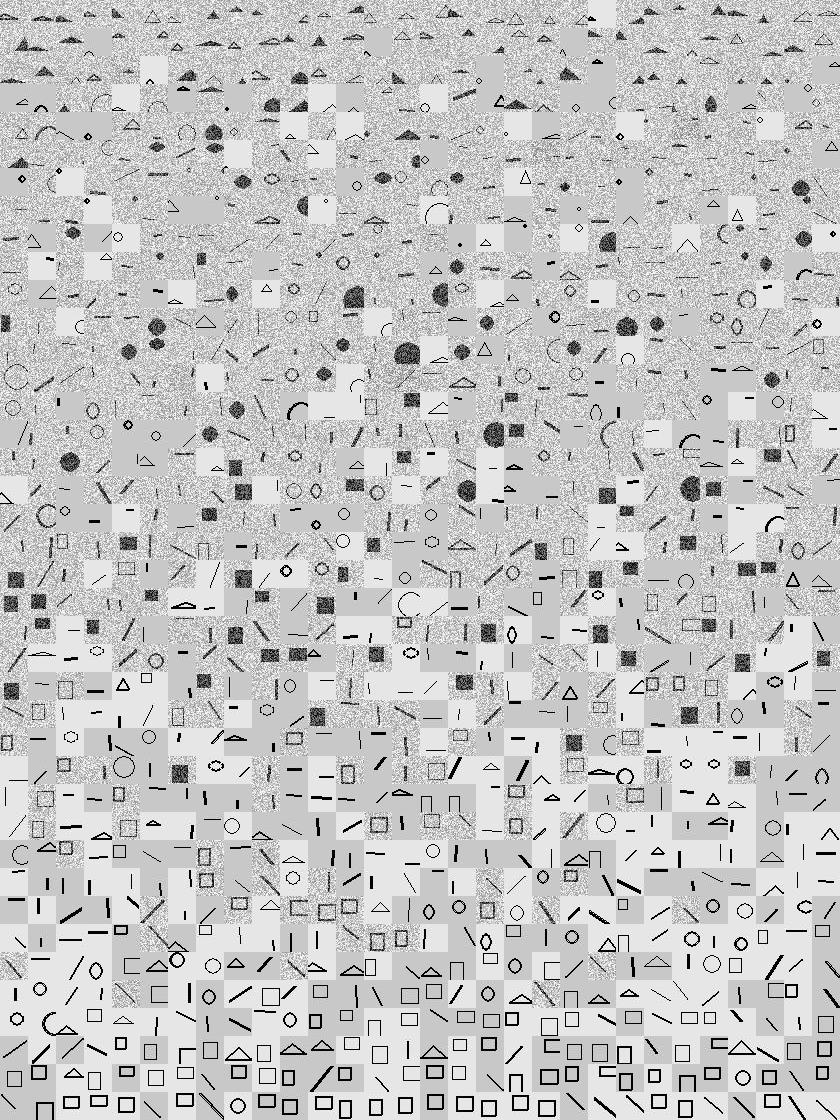

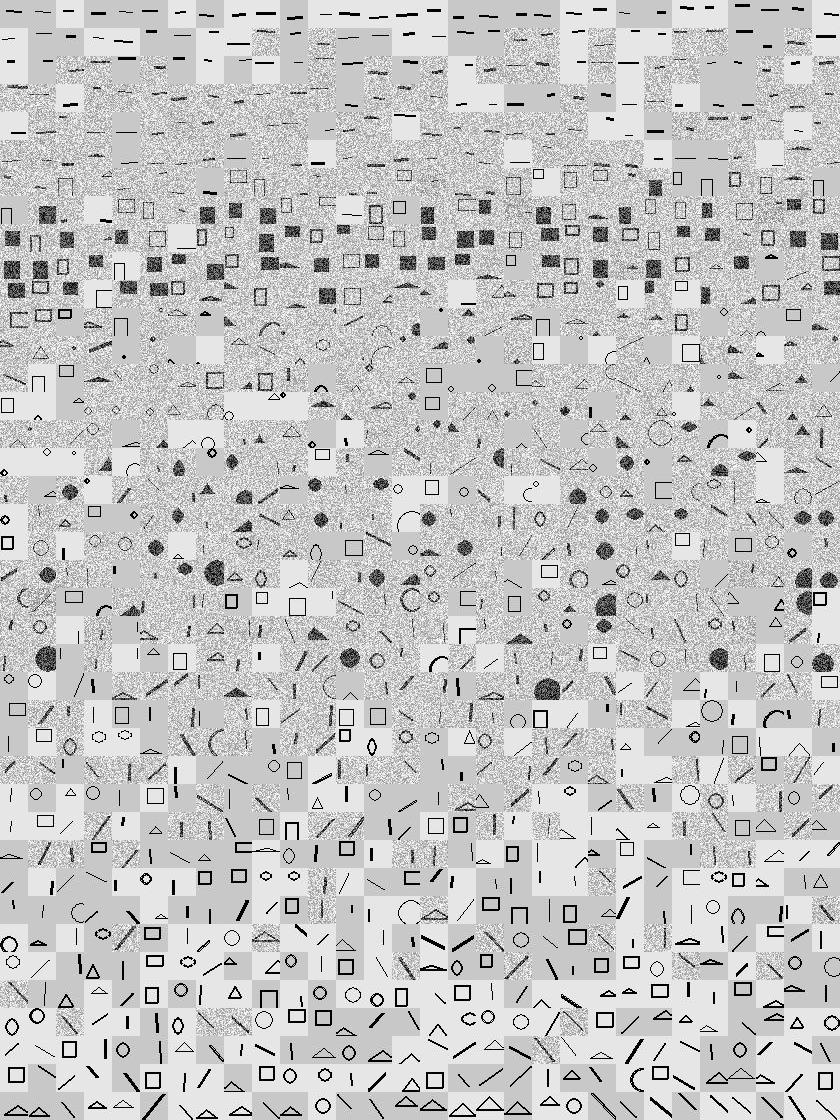

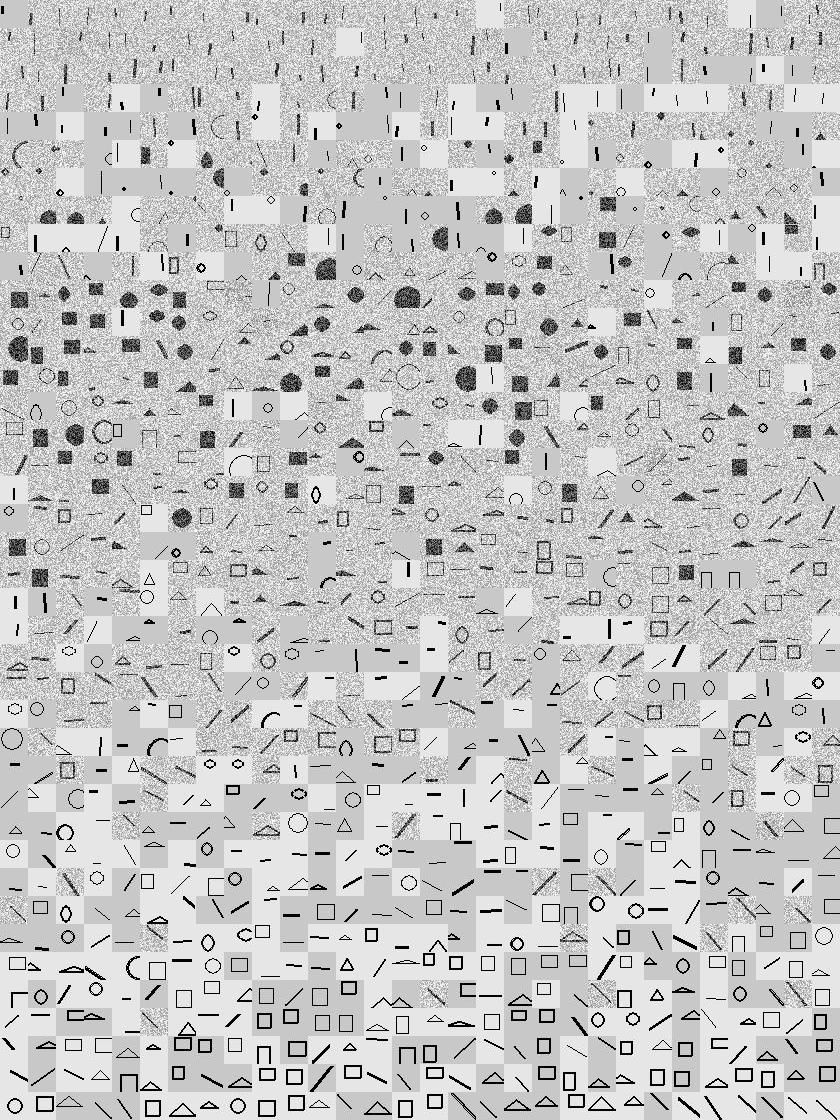

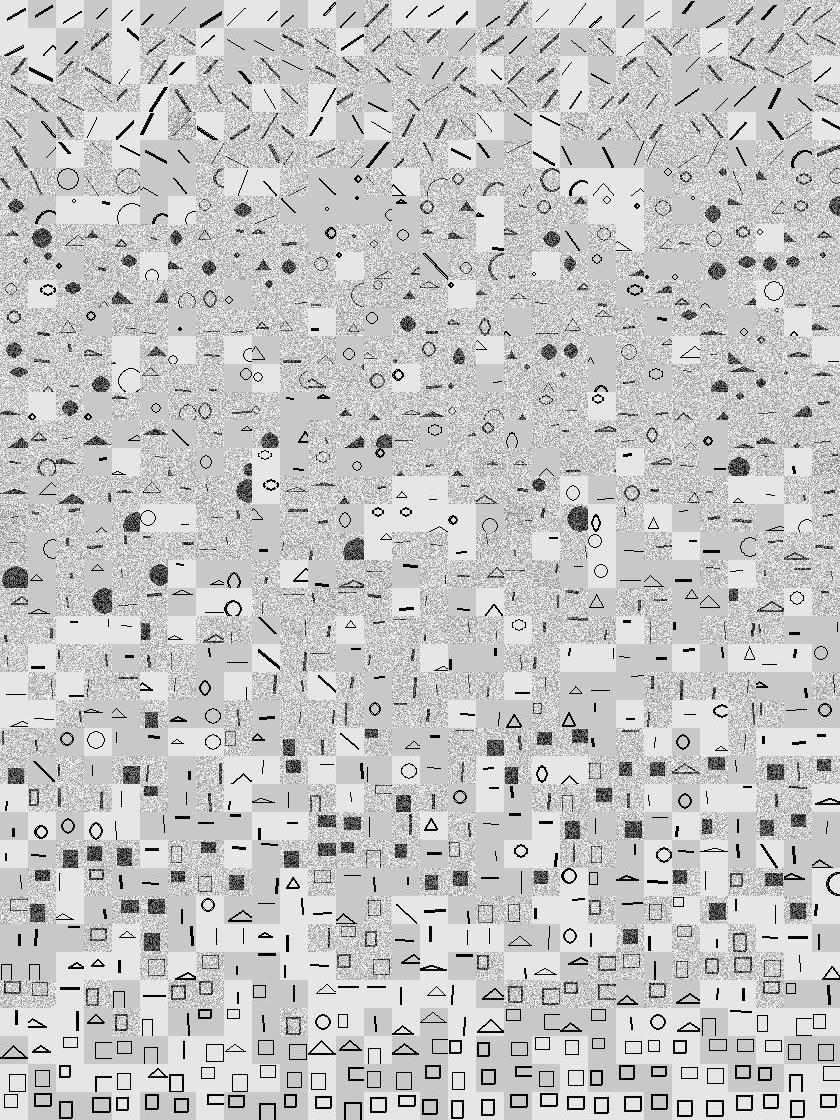

In [23]:
getCompareImages("circle", ordered_circle_dist)
getCompareImages("square", ordered_square_dist)
getCompareImages("triangle", ordered_triangle_dist)
getCompareImages("horizontal", ordered_hor_dist)
getCompareImages("vertical", ordered_ver_dist)
getCompareImages("diagonal", ordered_dia_dist)

In [24]:
def getCountTop(total, ordered_shape_dist, shape):
    count = [0, 0, 0, 0, 0, 0]
    for i in range(0, total):
        for j in range(0, len(shape)):
            if(total_filename[ordered_shape_dist[i]].find(shape[j]) != -1):
                count[j] = count[j] + 1
                break
    return count

In [25]:
topNumber = 100
shape_distribution = []
shape_distribution.append(getCountTop(topNumber, ordered_circle_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_square_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_triangle_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_hor_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_ver_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_dia_dist, label))


for i in range(0, len(label)):
    print(label[i], "distribution :", shape_distribution[i])
    for j in range(len(shape_distribution)):
        print("\t", label[j], shape_distribution[i][j]/topNumber*100, "%")
    print()

circle distribution : [100, 0, 0, 0, 0, 0]
	 circle 100.0 %
	 square 0.0 %
	 triangle 0.0 %
	 horizontal 0.0 %
	 vertical 0.0 %
	 diagonal 0.0 %

square distribution : [0, 100, 0, 0, 0, 0]
	 circle 0.0 %
	 square 100.0 %
	 triangle 0.0 %
	 horizontal 0.0 %
	 vertical 0.0 %
	 diagonal 0.0 %

triangle distribution : [0, 0, 100, 0, 0, 0]
	 circle 0.0 %
	 square 0.0 %
	 triangle 100.0 %
	 horizontal 0.0 %
	 vertical 0.0 %
	 diagonal 0.0 %

horizontal distribution : [0, 0, 0, 100, 0, 0]
	 circle 0.0 %
	 square 0.0 %
	 triangle 0.0 %
	 horizontal 100.0 %
	 vertical 0.0 %
	 diagonal 0.0 %

vertical distribution : [0, 0, 0, 0, 100, 0]
	 circle 0.0 %
	 square 0.0 %
	 triangle 0.0 %
	 horizontal 0.0 %
	 vertical 100.0 %
	 diagonal 0.0 %

diagonal distribution : [0, 0, 1, 0, 0, 99]
	 circle 0.0 %
	 square 0.0 %
	 triangle 1.0 %
	 horizontal 0.0 %
	 vertical 0.0 %
	 diagonal 99.0 %

